#**Classification with a single-layer perceptron**

###1. Generation of linearly-separable data


In [17]:
import numpy as np

n = 100
mA = [ 1.5, 1]
sigmaA = 0.3
mB = [-1.5, -1.0]
sigmaB = 0.3
classA = np.ones((3,n))
classB = -np.ones((3,n))
classA [0, :] = np.random.randn(n) * sigmaA + mA[0]
classA [1, :] = np.random.randn(n) * sigmaA + mA[1]
classB [0, :] = np.random.randn(n) * sigmaB + mB[0]
classB [1, :] = np.random.randn(n) * sigmaB + mB[1]
patterns = np.concatenate((classA, classB), axis=1)
np.random.shuffle(patterns.T)
targets=patterns[2,:].copy()
patterns[2,:]=1


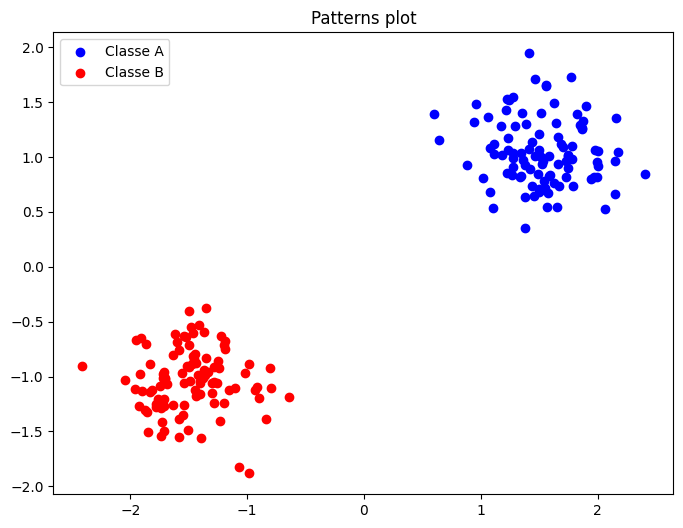

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(patterns[0,targets==1],patterns[1,targets==1],color="blue",label="Classe A")
plt.scatter(patterns[0,targets==-1],patterns[1,targets==-1],color="red",label="Classe B")
plt.legend()
plt.title("Patterns plot")
plt.show()



###2. Classification with a single-layer perceptron and analysis